#Data split

In [1]:
# !pip install split-folders

In [2]:
# import splitfolders 

# splitfolders.ratio(
#     "/content/drive/MyDrive/CXR/Resized/LabelRemoved", 
#     output="/content/drive/MyDrive/CXR/Resized/LRSplit", 
#     # seed=1337, 
#     ratio=(.7, .1, .2), 
#     group_prefix=None
# )

In [3]:
# !rm -r "/content/drive/MyDrive/CXR/Resized/LRSplit/val/.ipynb_checkpoints"

#Delete image files from MyDrive to help mount drive.

In [4]:
# import os
# directory = "/content/drive/MyDrive"

# files_in_directory = os.listdir(directory)
# filtered_files = [file for file in files_in_directory if file.endswith(".jpeg")]
# for file in filtered_files:
#   path_to_file = os.path.join(directory, file)
#   os.remove(path_to_file)

#Mount drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Libraries

In [7]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# import all libraries
# Train/Test Libraries
import os
import numpy as np
import tensorflow as tf
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import scikitplot
from sklearn.metrics import roc_curve, auc

#Load image files as numpy files. The train, val and test folders should have subfolders 0 and 1.

In [13]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from tqdm.notebook import tqdm

os.chdir('/content/drive/MyDrive/CXR/Resized')
dataDir = './LRSplit'
directories = os.listdir(dataDir)

def Read_Images_and_Make_Numpy_Files(directory):
  images = []
  labels = []
  classes = os.listdir(os.path.join(dataDir, directory))
  print('{} Directory Classes: {}'.format(directory, classes))
  for class_ in classes:
    if class_ == '0':
      print('Reading Data for {} class'.format(class_))
      imageNames = os.listdir(os.path.join(dataDir, directory, class_))
      for imgName in tqdm(imageNames):
        img = load_img(os.path.join(dataDir, directory, class_, imgName), target_size=(224, 224), color_mode='rgb', interpolation='lanczos')
        img_array = img_to_array(img, data_format='channels_last', dtype='float32')
        images.append(img_array)
        labels.append(0)
    elif class_ == '1':
      print('Reading Data for {} class'.format(class_))
      imageNames = os.listdir(os.path.join(dataDir, directory, class_))
      for imgName in tqdm(imageNames):
        img = load_img(os.path.join(dataDir, directory, class_, imgName), target_size=(224, 224), color_mode='rgb', interpolation='lanczos')
        img_array = img_to_array(img, data_format='channels_last', dtype='float32')
        images.append(img_array)
        labels.append(1)
    
  
  images = np.array(images).reshape(-1, 224, 224, 3)
  print('{} Data: {}'.format(directory, images.shape))
  labels = np.array(labels)
  print('{} Labels: {}'.format(directory, labels.shape))
  np.save('/content/drive/MyDrive/CXR/Resized/LRSplit/{}_images'.format(directory), images)
  np.save('/content/drive/MyDrive/CXR/Resized/LRSplit/{}_labels'.format(directory), labels)


for directory in directories:
    if directory=='train':
      Read_Images_and_Make_Numpy_Files(directory)
    elif directory=='val':
      Read_Images_and_Make_Numpy_Files(directory)
    elif directory=='test':
      Read_Images_and_Make_Numpy_Files(directory)

train Directory Classes: ['0', '1']
Reading Data for 0 class


  0%|          | 0/4389 [00:00<?, ?it/s]

Reading Data for 1 class


  0%|          | 0/438 [00:00<?, ?it/s]

train Data: (4827, 224, 224, 3)
train Labels: (4827,)
val Directory Classes: ['0', '1']
Reading Data for 0 class


  0%|          | 0/627 [00:00<?, ?it/s]

Reading Data for 1 class


  0%|          | 0/62 [00:00<?, ?it/s]

val Data: (689, 224, 224, 3)
val Labels: (689,)
test Directory Classes: ['0', '1']
Reading Data for 0 class


  0%|          | 0/1254 [00:00<?, ?it/s]

Reading Data for 1 class


  0%|          | 0/127 [00:00<?, ?it/s]

test Data: (1381, 224, 224, 3)
test Labels: (1381,)


#Load the numpy files for training

In [10]:
%cd '/content/drive/MyDrive/CXR/Resized/HypothesisTesting/HT2'

/content/drive/.shortcut-targets-by-id/1rM38i8TRyC9xDEe4zZV6JH1R_RZAEUbA/CXR/Resized/HypothesisTesting/HT2


In [11]:
IMG_SIZE = 224

train_x = np.load('./train_images.npy')
train_y = np.load('./train_labels.npy')
val_x = np.load('./val_images.npy')
val_y = np.load('./val_labels.npy')
test_x = np.load('./test_images.npy')
test_y = np.load('./test_labels.npy')

print('Training Images: {} | Validation Images: {} | Test Images: {}'.format(train_x.shape, val_x.shape, test_x.shape))
print('Training Labels: {} | Validation Labels: {} | Test Labels: {}'.format(train_y.shape, val_y.shape, test_y.shape))

# Data Normalization

print('Train: {} , {} | Val: {} , {} | Test: {} , {}'.format(train_x.min(), train_x.max(), val_x.min(), val_x.max(), test_x.min(), test_x.max()))

train_x/=255.0
val_x/=255.0
test_x/=255.0

print('Train: {} , {} | Val: {} , {} | Test: {} , {}'.format(train_x.min(), train_x.max(), val_x.min(), val_x.max(), test_x.min(), test_x.max()))


Training Images: (5666, 224, 224, 3) | Validation Images: (809, 224, 224, 3) | Test Images: (1621, 224, 224, 3)
Training Labels: (5666,) | Validation Labels: (809,) | Test Labels: (1621,)
Train: 0.0 , 255.0 | Val: 0.0 , 255.0 | Test: 0.0 , 255.0
Train: 0.0 , 1.0 | Val: 0.0 , 1.0 | Test: 0.0 , 1.0


In [12]:
# Class Mapping 
print('0:Healthy | 1:Tuberculosis')

# Distribution of images in each class for Training-set
print(Counter(train_y))

# Distribution of images in each class for Val-set
print(Counter(val_y))

# Distribution of images in each class for Test-set
print(Counter(test_y))

# Make Labels Categorical
train_y_oneHot = tf.one_hot(train_y, depth=2) 
val_y_oneHot = tf.one_hot(val_y, depth=2)
test_y_oneHot = tf.one_hot(test_y, depth=2)

print('Training Labels: {} | Validation Labels: {} | Test Labels: {}'.format(train_y_oneHot.shape, val_y_oneHot.shape, test_y_oneHot.shape))


0:Healthy | 1:Tuberculosis
Counter({0: 5153, 1: 513})
Counter({0: 736, 1: 73})
Counter({0: 1473, 1: 148})
Training Labels: (5666, 2) | Validation Labels: (809, 2) | Test Labels: (1621, 2)


In [17]:
# initialize the training data augmentation object
trainAug = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range = 0.15,
                                                          width_shift_range = 0.15,
                                                          rotation_range = 10,
                                                          shear_range = 0.1,
                                                          fill_mode = 'nearest',
                                                          zoom_range=0.2
                                                          )
def MobileNetV2_Model():
  # load the VGG16 network, ensuring the head FC layer sets are left off
  baseModel = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
  # construct the head of the model that will be placed on top of the the base model
  output = baseModel.output
  output = tf.keras.layers.GlobalAveragePooling2D()(output)
  output = tf.keras.layers.Dense(1024, activation="relu")(output)
  output = tf.keras.layers.Dropout(0.15)(output)
  output = tf.keras.layers.Dense(512, activation="relu")(output)
  output = tf.keras.layers.Dropout(0.15)(output)
  output = tf.keras.layers.Dense(2, activation="softmax")(output)
  # place the head FC model on top of the base model (this will become the actual model we will train)
  model = tf.keras.Model(inputs=baseModel.input, outputs=output)
  # loop over all layers in the base model and freeze them so they will not be updated during the first training process
  for layer in baseModel.layers:
    layer.trainable = False
  return model

model = MobileNetV2_Model()
# compile our model
print("[INFO] compiling model...")
# initialize the initial learning rate, number of epochs to train for, and batch size
INIT_LR = 0.001
EPOCHS = 100
BATCHSIZE = 32 
optimizer = tf.keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()])
print(model.summary())

9420800/9406464 [==============================] - 0s 0us/step
[INFO] compiling model...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 block_2_project_BN (BatchNorma  (None, 56, 56, 24)  96          ['block_2_project[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_2_add (Add)              (None, 56, 56, 24)   0           ['block_1_project_BN[0][0]',     
                                                                  'block_2_project_BN[0][0]']     
                                                                                                  
 block_3_expand (Conv2D)        (None, 56, 56, 144)  3456        ['block_2_add[0][0]']            
                                                                                                  
 block_3_expand_BN (BatchNormal  (None, 56, 56, 144)  576        ['block_3_expand[0][0]']         
 ization)                                                                                         
          

In [ ]:
# # Fine-tune
# # initialize the training data augmentation object
# trainAug = tf.keras.preprocessing.image.ImageDataGenerator(height_shift_range = 0.15,
#                                                           width_shift_range = 0.15,
#                                                           rotation_range = 10,
#                                                           shear_range = 0.1,
#                                                           fill_mode = 'nearest',
#                                                           zoom_range=0.2
#                                                           )
# # load model
# model = tf.keras.models.load_model('/content/drive/MyDrive/CXR/FinalModels/Pretrained/mobilenetv2-best-model.h5')

# # initialize the initial learning rate, number of epochs to train for, and batch size
# INIT_LR = 0.001
# EPOCHS = 100
# BATCHSIZE = 32 
# optimizer = tf.keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()])
# print(model.summary())

In [18]:
modelPath = './saved Models/Classification/Pretrained MobileNetV2'
if not os.path.exists(modelPath):
  os.makedirs(modelPath)
  print('Model Directory Created')
else:
  print('Model Directory Already Exists')

reduceLROnPlat = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.8, patience=10, verbose=1, mode='auto',
                                                      min_delta=0.0001, cooldown=5, min_lr=0.0001)
early = tf.keras.callbacks.EarlyStopping(monitor="val_categorical_accuracy", mode="auto", patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(modelPath+'/mobilenetv2-best-model.h5', monitor='val_categorical_accuracy',
                                                      verbose=1, save_best_only=True, mode='auto')

STEP_TRAIN = len(train_x) // BATCHSIZE


modelHistory = model.fit(trainAug.flow(train_x, train_y_oneHot, batch_size=BATCHSIZE), steps_per_epoch=STEP_TRAIN, 
                         validation_data= (test_x, test_y_oneHot), epochs=EPOCHS, verbose=1, callbacks=[model_checkpoint, reduceLROnPlat])

tf.keras.models.save_model(model, modelPath+'/mobilenetv2-model.h5', overwrite=True, include_optimizer=True, save_format=None,
                           signatures=None, options=None)

Model Directory Created
Epoch 1/100
150/150 [==============================] - ETA: 0s - loss: 0.1894 - categorical_accuracy: 0.9545 - auc: 0.9736
Epoch 1: val_categorical_accuracy improved from -inf to 0.97388, saving model to ./saved Models/Classification/Pretrained MobileNetV2/mobilenetv2-best-model.h5
150/150 [==============================] - 64s 341ms/step - loss: 0.1894 - categorical_accuracy: 0.9545 - auc: 0.9736 - val_loss: 0.1028 - val_categorical_accuracy: 0.9739 - val_auc: 0.9905 - lr: 0.0010
Epoch 2/100
150/150 [==============================] - ETA: 0s - loss: 0.1276 - categorical_accuracy: 0.9716 - auc: 0.9816
Epoch 2: val_categorical_accuracy improved from 0.97388 to 0.97533, saving model to ./saved Models/Classification/Pretrained MobileNetV2/mobilenetv2-best-model.h5
150/150 [==============================] - 49s 330ms/step - loss: 0.1276 - categorical_accuracy: 0.9716 - auc: 0.9816 - val_loss: 0.0899 - val_categorical_accuracy: 0.9753 - val_auc: 0.9954 - lr: 0.0010
E

In [13]:
# Evaluate the Best Saved Model
model = tf.keras.models.load_model('./saved Models/Classification/Pretrained MobileNetV2/mobilenetv2-best-model.h5')
loss, accuracy, auc= model.evaluate(x=test_x, y=test_y_oneHot, batch_size=32, verbose=1)
print('Model Accuracy: {:0.2f} | Model Loss: {:0.4f} | Model AUC: {:.02f}'.format(accuracy, loss, auc))

51/51 [==============================] - 15s 51ms/step - loss: 0.1090 - categorical_accuracy: 0.9735 - auc: 0.9887
Model Accuracy: 0.97 | Model Loss: 0.1090 | Model AUC: 0.99


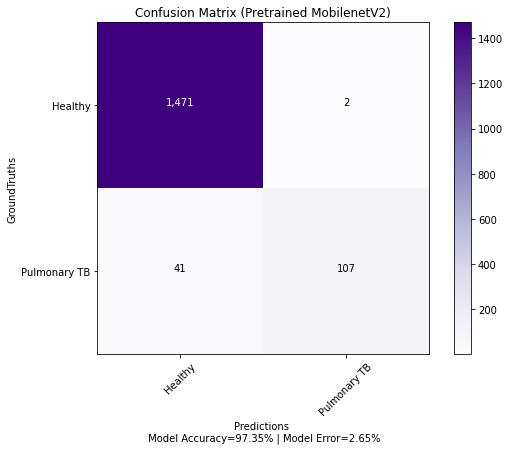

In [14]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Purples')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('GroundTruths')
    plt.xlabel('Predictions \n Model Accuracy={:0.2f}% | Model Error={:0.2f}%'.format(accuracy*100, misclass*100))
    # plt.savefig('/content/drive/My Drive/GitHub Repositories/Tuberculosis/ReadMe Images/MobilenetV2-cm.png', bbox_inches = "tight")
    plt.show()


predictions = model.predict(x=test_x, batch_size=32)
predictions = tf.keras.backend.argmax(predictions, axis=-1)

test_y = tf.keras.backend.argmax(test_y_oneHot, axis=-1)
cm = confusion_matrix(test_y, predictions)
classes = ['Healthy', 'Pulmonary TB']
plot_confusion_matrix(cm=cm, normalize = False, target_names = classes, title= "Confusion Matrix (Pretrained MobilenetV2)")


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true=test_y,y_pred=predictions,target_names =['NORMAL','TUBERCULOSIS']))

              precision    recall  f1-score   support

      NORMAL       0.97      1.00      0.99      1473
TUBERCULOSIS       0.98      0.72      0.83       148

    accuracy                           0.97      1621
   macro avg       0.98      0.86      0.91      1621
weighted avg       0.97      0.97      0.97      1621



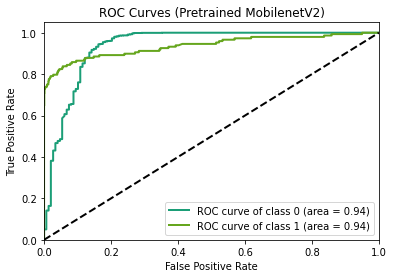

In [16]:
#Plot ROC Curve with Library
predictions = model.predict(x=test_x, batch_size=32)
# One can define colormap here
# cmap = mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan'])
scikitplot.metrics.plot_roc(y_true=test_y, y_probas=predictions, title='ROC Curves (Pretrained MobilenetV2)', plot_micro=False, plot_macro=False,
                            classes_to_plot=None, ax=None, figsize=(6, 4), cmap='Dark2', title_fontsize='large', text_fontsize='medium')
# plt.savefig('/content/drive/My Drive/GitHub Repositories/Tuberculosis/ReadMe Images/MobilenetV2-roc.png', bbox_inches = "tight")
plt.show()


2.8.0


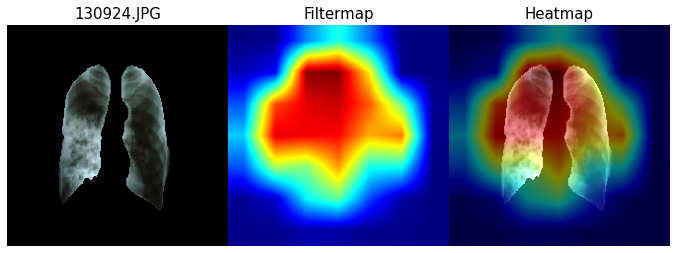

In [17]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# %cd '/content/drive/MyDrive/CXR/Resized/Gradcam'

print(tf.__version__)
validDir =  '/content/drive/MyDrive/CXR/Resized/Gradcam/Seg'
# validDir =  '/content/drive/MyDrive/CXR/Resized/FineTuneSegmented/ALL/train'

LAYER_NAME = 'out_relu'
model = tf.keras.models.load_model('/content/drive/MyDrive/CXR/AMMI THESIS RESULTS/Best Segmented Model/mobilenetv2-best-model.h5')
grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(LAYER_NAME).output, model.output])

# imgNames = ['MCUCXR_0126_1.png', 'CHNCXR_0601_1.png', 'CHNCXR_0553_1.png', 'CHNCXR_0454_1.png', 'CHNCXR_0332_1.png']
imgNames = os.listdir(os.path.join(validDir, '1'))
for imgName in imgNames:
  IMAGE_PATH = os.path.join(validDir, '1', imgName)
  img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224))
  img = tf.keras.preprocessing.image.img_to_array(img, dtype='uint8')
  img_array = img/255.0
  predictions = model.predict(np.expand_dims(img_array, axis=0))
  if np.argmax(predictions)==1:
    with tf.GradientTape() as tape:
      conv_outputs, predictions = grad_model(np.array([img_array]))
      loss = predictions[:, np.argmax(predictions)]

    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]

    gate_f = tf.cast(output > 0, 'float32')
    gate_r = tf.cast(grads > 0, 'float32')
    guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

    weights = tf.reduce_mean(guided_grads, axis=(0, 1))

    cam = np.ones(output.shape[0: 2], dtype = np.float32)

    for i, w in enumerate(weights):
        cam += w * output[:, :, i]

    cam = cv2.resize(cam.numpy(), (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = cv2.cvtColor(cam, cv2.COLOR_BGR2RGB)
    output_image = cv2.addWeighted(img, 0.8, cam, 0.5, 0)
    rows = 1
    cols = 3
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(9.5, 10.5), squeeze=False)
    for r in range(rows):
      # plot image
      ax[r][0].imshow(img)
      ax[r][0].set_title(imgName, fontsize=15)
      ax[r][0].axis('off')

      # plot image
      ax[r][1].imshow(cam)
      ax[r][1].set_title('Filtermap', fontsize=15)
      ax[r][1].axis('off')
      
      # plot heatmap
      ax[r][2].imshow(output_image)
      ax[r][2].set_title('Heatmap', fontsize=15)
      ax[r][2].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    plt.close()
    
  



  
  
